In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, date
from IPython.display import HTML

In [2]:
ff = np.load('./fourier_features/fourier_features.npy')

In [3]:
ff.shape

(10958, 5000)

In [4]:
raw_data = pd.read_csv('./final_data.csv')

In [5]:
raw_data.set_index('time', inplace=True)

In [6]:
raw_data

,location,moon_phase,mercury_lambda,mercury_beta,mercury_delta,mercury_x,mercury_y,mercury_z,venus_lambda,venus_beta,...,moon_delta,moon_x,moon_y,moon_z,sun_lambda,sun_beta,sun_delta,sun_x,sun_y,sun_z
time,,,,,,,,,,,,,,,,,,,,,
1850-01-01 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",0.594418,288.632,-3.164440,1.399640,0.446477,-1.324266,-0.077263,266.836,-0.395980,...,0.059980,-0.044008,0.040719,-0.001673,281.903,-0.102258,1.210290,0.249630,-1.184265,-0.002160
1850-01-06 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.699594,297.953,-1.457120,1.301858,0.610038,-1.149606,-0.033105,275.048,-1.195560,...,0.050191,-0.045377,-0.021266,0.002791,286.939,0.529867,1.087131,0.316727,-1.039922,0.010054
1850-01-11 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",2.667750,307.863,-2.915800,1.262111,0.773641,-0.995128,-0.064201,281.099,-0.566399,...,0.153222,-0.009782,-0.152298,0.013661,292.510,-2.305650,1.062832,0.406572,-0.981063,-0.042758
1850-01-16 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",2.659808,315.321,-0.096232,1.063265,0.756044,-0.747614,-0.001786,286.904,0.479341,...,0.019132,0.015506,-0.011205,-0.000190,297.705,0.263339,1.147235,0.533360,-1.015701,0.005273
1850-01-21 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.654473,321.552,-0.395983,0.889953,0.696966,-0.553368,-0.006151,294.050,-1.111440,...,0.054273,0.047969,0.024732,-0.005727,301.224,0.636106,0.888862,0.460743,-0.760061,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-11 0:00,"(4461340.48313723, 919588.07009129, 4449530.22...",2.562084,239.001,0.926911,1.101972,-0.567462,-0.944464,0.017827,215.788,3.411740,...,0.035193,0.012883,-0.032747,0.000419,259.451,0.251098,0.988020,-0.180879,-0.971312,0.004330
1999-12-16 0:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.575497,245.172,0.221011,1.112516,-0.467135,-1.009683,0.004291,222.666,2.812540,...,0.110062,0.109215,-0.011288,-0.007633,265.933,-0.991370,0.832644,-0.059051,-0.830423,-0.014406
1999-12-21 0:00,"(4461340.48313723, 919588.07009129, 4449530.22...",0.435922,255.344,-2.639690,1.272496,-0.321628,-1.229783,-0.058605,227.904,1.491580,...,0.024495,0.010795,0.021852,-0.002434,267.542,0.374574,1.187509,-0.050935,-1.186391,0.007763


### Data Exploration

In [7]:
# create Mars complex coordinates
mars_ecliptical = raw_data[['mars_lambda', 'mars_delta']].values
mars_y = mars_complex = mars_ecliptical[:, 1] * (np.cos(mars_ecliptical[:, 0]) + 1j * np.sin(mars_ecliptical[:, 0]))

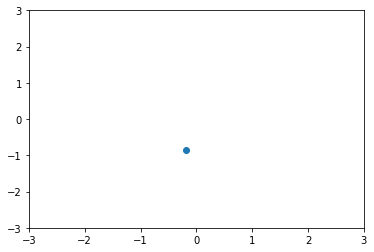

In [8]:
temp_real, temp_imag = np.array([mars_y.real[0]]), np.array([mars_y.imag[0]])
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
scatter = ax.scatter(temp_real, temp_imag)

def update(frame_number):
    data_point = mars_y[frame_number]
    scatter.set_offsets(np.array([data_point.real, data_point.imag]))
    return scatter,

anim = FuncAnimation(fig, update, frames=144, interval=50, blit=False)
HTML(anim.to_html5_video())

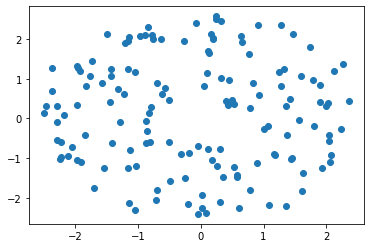

In [69]:
plt.scatter(mars_complex.real[:73 * 2], mars_complex.imag[:73 * 2])

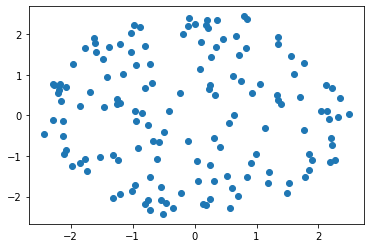

In [67]:
# mars orbit is 637 days
plt.scatter(mars_complex.real[73 * 2:73 * 4], mars_complex.imag[73 * 2:73 * 4])

In [105]:
def animate(w_hat, freqs, mars_ys):
    """
    Adapted from <https://github.com/nschloe/epicycler/blob/master/epicycler/main.py>
    """
    fig, ax = plt.subplots(dpi=150)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis("square")

    radii = np.abs(w_hat)

    print(radii)

    new_red = "#d62728"
    dot = plt.plot([], [], ".", color=new_red)[0]
    circles = [
        plt.Circle((0.0, 0.0), radius, color="k", fill=False) for radius in radii
    ]

    for circle in circles:
        ax.add_artist(circle)

    xlim = [np.min(mars_ys.real), np.max(mars_ys.real)]
    ylim = [np.min(mars_ys.imag), np.max(mars_ys.imag)]
    width = xlim[1] - xlim[0]
    height = ylim[1] - ylim[0]
    xlim = [xlim[0] - 0.1 * width, xlim[1] + 0.1 * width]
    ylim = [ylim[0] - 0.1 * height, ylim[1] + 0.1 * height]


    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([ylim[0], ylim[1]])

    plt.plot(mars_ys.real, mars_ys.imag, ".", color="0.7", zorder=0)

    def init():
        return circles + [dot]

    def animate(t):
        vals = w_hat * np.power(freqs, t)
        cs = np.cumsum(vals)
        centers = cs[:-1]
        for circle, center in zip(circles, centers):
            circle.center = [center.real, center.imag]
        dot.set_data(cs[-1].real, cs[-1].imag)
        return circles + [dot]

    num_frames = 500

    dates = [datetime.strptime(time.split(' ')[0], '%Y-%m-%d') for time in raw_data.index.values]
    dates = [(d0.date() - date(d0.year, 1, 1)).days for d0 in dates][:len(mars_ys)]

    anim = FuncAnimation(
            fig,
            animate,
            init_func=init,
            frames=np.linspace(0, 674, num_frames),
            interval=100,
            blit=True,
        )
    
    return anim


### Method

Any regression method operating on the fourier features results in some position in the complex plane. This implies any regression method should operate in ecliptical coordinates (basically complex coordinates).

Since our conceputalizaiton of the universe is 2-D (fourier features are 2D that is) => we can get rid of one of the angular dimensions. In our it makes much more sense to get rid of the latitude $\beta$ since we want the movement of the planets around the earth.

This implies our regression method has a fourier feature matrix (N features for each data point), and solves for the ecliptical coordinates $\lambda$ and $\Delta$ converted to complex coordinates

We cannot simply just use sklearn since we're operating in the complex domain; however as we have learned in class we can use OLS with the conjugate tranpose which results in the same analytical solution.

Theres a fantastic breakdown on the benefits / fit of complex regression vs. multivariate linear regression here: https://stats.stackexchange.com/questions/66088/analysis-with-complex-data-anything-different

In [11]:
mars_y

array([ 0.43062324+0.33124548j,  0.52525019+0.37078692j,
        0.40965129+0.43368689j, ..., -1.65308513-1.07395697j,
       -0.04943086+1.78064192j,  0.78347286+1.67972447j])

In [12]:
# run linear regression
mars_ols = np.linalg.lstsq(ff, mars_y)

/Users/kaahan/miniconda3/envs/project_s/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [65]:
# run ridge regression
# get svd
u, s, vh = np.linalg.svd(ff, full_matrices=False)
lam = 1e-12
mars_ridge = vh.conj().T @ np.linalg.inv(np.diag(s.conj().T) @ np.diag(s) + lam * np.eye(s.shape[0])) @ np.diag(s).conj().T @ u.conj().T @ mars_y

In [80]:
# w = mars_ols[0]
w = mars_ridge.copy()

In [81]:
w

array([-1.06850031+0.53811363j, -0.02475936+0.39425022j,
        0.1796142 -0.64409398j, ...,  0.00326524+0.02080903j,
        0.01640544+0.22696816j, -0.05293045-0.02101571j])

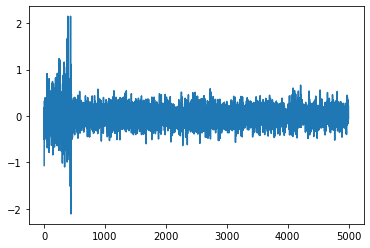

In [82]:
plt.plot(w.real)

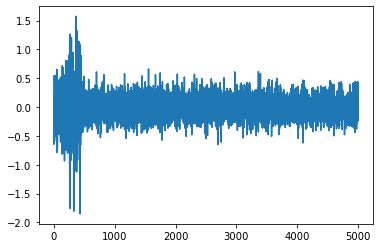

In [83]:
plt.plot(w.imag)

In [41]:
np.linalg.norm(w)

21.800028540343206

In [96]:
np.linalg.norm((ff @ w)[:144] - mars_y[:144], 2)

22.244327474395416

In [107]:
n = 2
# n most important fourier features as determined by regression
top_feats =(-np.abs(w)).argsort()[:n]

In [108]:
# what periods are we taking?
top_feats

array([433, 440])

In [109]:
w_hat = w[top_feats]
d = 5000
freqs = np.array([np.power(np.e, 2 * np.pi * 1j * (i / d)) for i in range(d)])[top_feats]

In [110]:
np.linalg.norm((ff[:, top_feats] @ w_hat)[:144] - mars_y[:144], 2)

56.523955977464304

In [111]:
mars_ys = mars_y[:144]

[2.83696657 2.21468879]


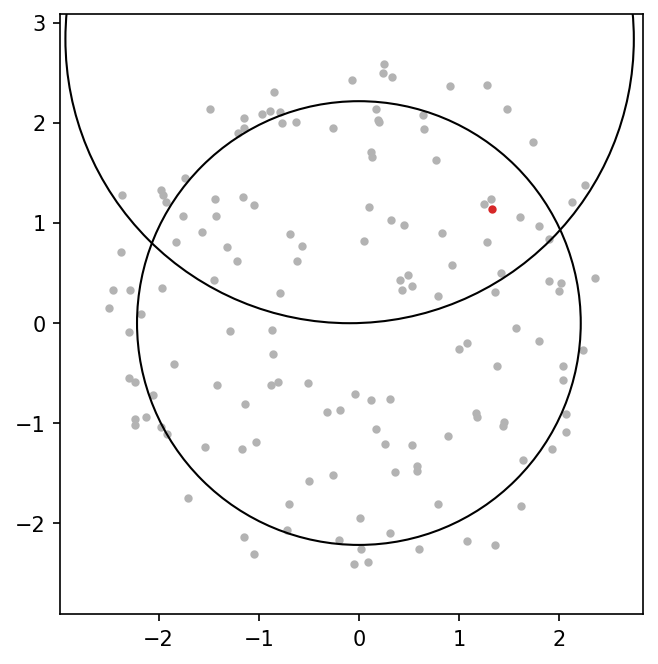

In [112]:
HTML(animate(w_hat, freqs, mars_ys).to_html5_video())

In [28]:
def animate_poly(
    polygon,
    xylim="polygon",
    show_axes=True,
    output_filename=None,
    cutoff_radius=0.0,
    invert_yaxis=False,
):
    n = polygon.shape[0]
    a = np.fft.fft(polygon[:, 0] + 1j * polygon[:, 1])
    
    print(a)
    freqs = np.fft.fftfreq(n)

    fig, ax = plt.subplots()

    # Make the plot tighter, <https://stackoverflow.com/a/15883620/353337>
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

    ax.axis("square")

    radii = np.abs(a / n)

    cut = radii > cutoff_radius
    a = a[cut]
    radii = radii[cut]
    freqs = freqs[cut]

    new_red = "#d62728"
    dot = plt.plot([], [], ".", color=new_red)[0]
    circles = [
        plt.Circle((0.0, 0.0), radius, color="k", fill=False) for radius in radii[1:]
    ]
    for circle in circles:
        ax.add_artist(circle)

    if xylim == "polygon":
        xlim = [np.min(polygon[:, 0]), np.max(polygon[:, 0])]
        ylim = [np.min(polygon[:, 1]), np.max(polygon[:, 1])]
        width = xlim[1] - xlim[0]
        height = ylim[1] - ylim[0]
        xlim = [xlim[0] - 0.1 * width, xlim[1] + 0.1 * width]
        ylim = [ylim[0] - 0.1 * height, ylim[1] + 0.1 * height]
    elif xylim == "circles":
        sum_radii = np.sum(radii[1:])
        center0 = [a[0].real / n, a[0].imag / n]
        xlim = [center0[0] - 1.1 * sum_radii, center0[0] + 1.1 * sum_radii]
        ylim = [center0[1] - 1.1 * sum_radii, center0[1] + 1.1 * sum_radii]
    else:
        assert len(xylim) == 4
        xylim = [float(x) for x in xylim]
        xlim = xylim[:2]
        ylim = xylim[2::]

    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([ylim[0], ylim[1]])

    if invert_yaxis:
        ax.invert_yaxis()

    if not show_axes:
        ax.axis("off")

    plt.plot(polygon[:, 0], polygon[:, 1], ".", color="0.7")

    def init():
        return circles + [dot]

    def animate(t):
        vals = a / n * np.exp(1j * np.multiply.outer(t, n * freqs))
        cs = np.cumsum(vals)
        centers = cs[:-1]
        for circle, center in zip(circles, centers):
            circle.center = [center.real, center.imag]
        dot.set_data(cs[-1].real, cs[-1].imag)
        return circles + [dot]

    num_frames = 1000

    anim = FuncAnimation(
        fig,
        animate,
        init_func=init,
        frames=np.linspace(0.0, 2 * np.pi, num_frames),
        interval=100,
        blit=True,
    )

#     if output_filename:
#         anim.save(
#             output_filename,
#             fps=60,
#             # writer="imagemagick",
#             # extra_args=['-vcodec', 'libx264']
#         )
#     else:
#         plt.show()
    return anim